## Import packages

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import intake
import s3fs

## Load catalog

In [2]:
# Open the CMIP6 data catalog, store as a variable
catalog = intake.open_esm_datastore('https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.json')

### print catalog

In [3]:
# Print the catalog to get a summary of its contents
catalog

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,709
grid_label,10
zstore,522217
dcpp_init_year,60


In [4]:
# Convert the catalog to a Pandas datazrame
cat_df = catalog.df

# print the contents of the datazrame
cat_df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ta,gn,s3://cmip6-pds/CMIP6/HighResMIP/CMCC/CMCC-CM2-...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,tauv,gn,s3://cmip6-pds/CMIP6/HighResMIP/CMCC/CMCC-CM2-...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,zg,gn,s3://cmip6-pds/CMIP6/HighResMIP/CMCC/CMCC-CM2-...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,vas,gn,s3://cmip6-pds/CMIP6/HighResMIP/CMCC/CMCC-CM2-...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/HighResMIP/CMCC/CMCC-CM2-...,NaN,20170706
...,...,...,...,...,...,...,...,...,...,...,...
522212,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,uas,gr,s3://cmip6-pds/CMIP6/CMIP/EC-Earth-Consortium/...,NaN,20211207
522213,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,va,gr,s3://cmip6-pds/CMIP6/CMIP/EC-Earth-Consortium/...,NaN,20211207
522214,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,wap,gr,s3://cmip6-pds/CMIP6/CMIP/EC-Earth-Consortium/...,NaN,20211207
522215,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tas,gr,s3://cmip6-pds/CMIP6/CMIP/EC-Earth-Consortium/...,NaN,20211207


## Query Database

The activity_id we are interested in is `CMIP` as that contains historical simulation data.

In [5]:
# Search through catalog, find all historical simulations
res = catalog.search(activity_id="CMIP", experiment_id="historical")

# Convert to a data frame
res_df = res.df

### we'll go with variable id `mrso`, for soil_moisture_content

In [6]:
# show all indices with the target variable
res_df.variable_id.loc[lambda x: x == "mrso"]

67       mrso
68       mrso
348      mrso
786      mrso
916      mrso
         ... 
82191    mrso
83261    mrso
83443    mrso
83890    mrso
85483    mrso
Name: variable_id, Length: 623, dtype: object

## Specify our activity ids

In [7]:
# activity_id = specify project in which simulations fall under
activity_ids = ['ScenarioMIP', 'CMIP'] # future projections and historical

# source_id = model names
models = ['CNRM-CM6-1'] # atmosphere-ocean general circulation model from center for meteorlogical research in france

# experimental_ids = scenarios (or historical)
scenarios = ['historical', 'ssp245', 'ssp585']

# member_id = ensemble member the set of programmed conditions that affect the behavior of the model. We can program a model with different environmental factors, even different physics just to see what happens.
conditions = 'r1i1p1f2' # the most average conditions available for these parameter arrangements

# table_id = specify spatial and temporal window & resolution
spatial_temporal = 'Lmon' # Monthly land surface and soil model fields

# variable_id = climatic variable
variable = "mrso" # soil moisture content

In [8]:
# make our query
soil_res = catalog.search(activity_id=activity_ids, 
                          source_id = models, 
                          experiment_id=scenarios, 
                          member_id = conditions, 
                          table_id = spatial_temporal, 
                          variable_id = variable)

# convert query to dataframe
sr_df = soil_res.df
sr_df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CNRM-CERFACS,CNRM-CM6-1,historical,r1i1p1f2,Lmon,mrso,gr,s3://cmip6-pds/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM...,NaN,20180917
1,ScenarioMIP,CNRM-CERFACS,CNRM-CM6-1,ssp245,r1i1p1f2,Lmon,mrso,gr,s3://cmip6-pds/CMIP6/ScenarioMIP/CNRM-CERFACS/...,NaN,20190219
2,ScenarioMIP,CNRM-CERFACS,CNRM-CM6-1,ssp585,r1i1p1f2,Lmon,mrso,gr,s3://cmip6-pds/CMIP6/ScenarioMIP/CNRM-CERFACS/...,NaN,20190219


# Prepare visualizations

## Extract data and load zarrs

For my analysis, I tried to go with places of the world that are heavily affected by desertification, or for which the current environmental impacts are otherwise significantly relate to reductiong in soil moisture. Overall, most of the area in the area of interests are tropical (below the 30 degree parallel line).

The Amazonas, Brazil is far inland, right in the middle of the Amazon rainforest. It is therefore a very wet climate, where little sunlight penetrates that canopy. The soils of the rainforest are very thin and nutrient poor however, because all the nutrients were pulled out of the ground by the massive flora. Deforestation in the amazon has been a hot subject due to its potential impacts to do irreverable harm to the broader ecosystem, in that due to the thin nature of the soils, exposing the land in this way can reduce the moisture contnent of the soils and lead to development of sahara's where there were once forests. A major contributor to this problem is intensive agriculture, as much of the land that has been cleared there has been for this purpose.

The environment of Tunisia, Africa in contrast is a comparatively much more arid one. The north of the country is mediterranian, while the south is and extremely arid desert. It is for this reason that the country has seen significant impacts from increasing temperatures, and salinization of its water resources. Although, I chose it as an area of interest due to its troubles with desertification. Intensive agriculture strips the land of its soils, leaving it less able to retain water. While a majority of Tunisia is fertile, as much as 75% of it is threatened by desertification, and it is currently causing the land of the country to become less hospitable to life.

#### Amazonas

In [9]:
# historical
amazonas_hist = xr.open_zarr(
    sr_df[
        (sr_df["experiment_id"] == "historical") & 
        (sr_df["source_id"] == models[0])]["zstore"].iloc[0], 
    storage_options = {'anon':True}
)


# future projections
amazonas_245 = xr.open_zarr(
    sr_df[
        (sr_df["experiment_id"] == "ssp245") & 
        (sr_df["source_id"] == models[0])]["zstore"].iloc[0], 
    storage_options = {'anon':True}
)
amazonas_585 = xr.open_zarr(
    sr_df[
        (sr_df["experiment_id"] == "ssp585") & 
        (sr_df["source_id"] == models[0])]["zstore"].iloc[0], 
    storage_options = {'anon':True}
)

#### Tunisia

In [10]:
# historical
tunisia_hist = xr.open_zarr(
    sr_df[(sr_df["experiment_id"] == "historical")] # select historical data
    ["zstore"].iloc[0], # select the zstore code from said data
    storage_options = {'anon':True} # pass null auth creds to amazon S3
)


# future projections
tunisia_245 = xr.open_zarr(
    sr_df[(sr_df["experiment_id"] == "ssp245")] # select med-low carbon scenario
    ["zstore"].iloc[0], # zstore selection
    storage_options = {'anon':True} # auth
)
tunisia_585 = xr.open_zarr(
    sr_df[(sr_df["experiment_id"] == "ssp585")] # high carbon scenario
    ["zstore"].iloc[0], # zstore selection
    storage_options = {'anon':True} # auth
)

### Extract soil moisture content data

In [11]:
# Amazonas historical
azhist_soil = amazonas_hist["mrso"]
# tunisia historical
tuhist_soil = tunisia_hist["mrso"]

# Amazonas simulations
az245_soil = amazonas_245["mrso"]
az585_soil = amazonas_585["mrso"]

# tunisia simulations
tu245_soil = tunisia_245["mrso"]
tu585_soil = tunisia_585["mrso"]

### Concat historical data and models

In [12]:
# amazonas
az245_soil = xr.concat([azhist_soil, az245_soil], dim = "time")
az585_soil = xr.concat([azhist_soil, az585_soil], dim = "time")

# tunisia
tu245_soil = xr.concat([tuhist_soil, tu245_soil], dim = "time")
tu585_soil = xr.concat([tuhist_soil, tu585_soil], dim = "time")

In [13]:
"""print coord ranges for the zars"""

print(f"amazonas 245 sim lowest lat: {amazonas_hist.lat.min().item()}")
print(f"amazonas 245 sim highest lat: {amazonas_hist.lat.max().item()}")

print(f"amazonas 245 sim lowest long: {amazonas_hist.lon.min().item()}")
print(f"amazonas 245 sim highest long: {amazonas_hist.lon.max().item()}\n")



print(f"tunisia 245 sim lowest lat: {tunisia_hist.lat.min().item()}")
print(f"tunisia 245 sim highest lat: {tunisia_hist.lat.max().item()}")

print(f"tunisia 245 sim lowest long: {tunisia_hist.lon.min().item()}")
print(f"tunisia 245 sim highest long: {tunisia_hist.lon.max().item()}")

amazonas 245 sim lowest lat: -88.92773535220698
amazonas 245 sim highest lat: 88.92773535220698
amazonas 245 sim lowest long: 0.0
amazonas 245 sim highest long: 358.59375

tunisia 245 sim lowest lat: -88.92773535220698
tunisia 245 sim highest lat: 88.92773535220698
tunisia 245 sim lowest long: 0.0
tunisia 245 sim highest long: 358.59375


## Visualization setup

### Init bounds

In [14]:
# amazonas
az_lat_min, az_lat_max = -13.897789063039482, 3.2657512406319285
az_lon_min, az_lon_max = -73.3848226691805 + 180, -55.670173674575096 + 180

# tunisia
tu_lat_min, tu_lat_max = 30.08722546700274, 37.534815567672254
tu_lon_min, tu_lon_max = 7.644046124528245, 11.778068815223975


# Develop and visualize time series

## Init functions

In [15]:
def get_trendline(historical, future, bbox):
    
    # concat historical data and predictive models
    full = xr.concat([historical, future], dim = "time")
        
    # init bounds
    lat_min, lat_max = bbox[0], bbox[1]
    lon_min, lon_max = bbox[2], bbox[3]
        
    
    
    # Take bounds and set logical mask
    
    
    # True when lat/lon are inside the established spatial range, but false elsewhere
    soil_lat_full = (full.lat >= lat_min) & (full.lat <= lat_max)
    soil_lon_full = (full.lon >= lon_min) & (full.lon <= lon_max)
    
    soil_lat_hist = (historical.lat >= lat_min) & (historical.lat <= lat_max)
    soil_lon_hist = (historical.lon >= lon_min) & (historical.lon <= lon_max)
    
    # filter based on mask
    model_soil_full_fix = full.where(soil_lat_full & soil_lon_full, drop=True)
    model_soil_hist_fix = historical.where(soil_lat_hist & soil_lon_hist, drop=True)

    
    
    # compute annual average for selected spatial region
    
    
    # average along the spatial dimensions
    model_soil_full_avg = model_soil_full_fix.mean(dim=['lat','lon']) 
    model_soil_hist_avg = model_soil_hist_fix.mean(dim=['lat','lon']) 
    
    # then consolidate those means to get a yearly average
    model_soil_full_yrly_mean = model_soil_full_avg.groupby('time.year').mean() 
    model_soil_hist_yrly_mean = model_soil_hist_avg.groupby('time.year').mean() 
    
    
    # fit the line
    x_hist = np.polyfit(model_soil_hist_yrly_mean.year, model_soil_hist_yrly_mean, 1) 
    x_full = np.polyfit(model_soil_full_yrly_mean.year, model_soil_full_yrly_mean, 1)
    # then generate the object
    trend_line_hist = np.poly1d(x_hist)
    trend_line = np.poly1d(x_full)
    
    # return all vars needed for the graph
    return trend_line, trend_line_hist, model_soil_full_yrly_mean, model_soil_hist_yrly_mean, x_full, x_hist
    


In [16]:
def visualize_model(model_trendlines, hist_trendline, model_means, hist_mean, model_slopes, hist_slope, title):
    
    # make iterable vars
    scenario_list = ['245', '585'] # scenario number for legend labeling
    color_list1 = ['midnightblue', 'peru'] # historical projection colors
    color_list2 = ['dodgerblue', 'crimson'] # future scenario colors
    
    # generate the graph
    fig, ax = plt.subplots(figsize=(14,7))
    
    # plot historical data once
    ax.plot(
        hist_mean.year, # x = year
        hist_trendline(hist_mean.year), # y = soil moisture 
        color='teal', 
        linestyle='-', 
        linewidth = 4, 
        label=f'Historical Trend Line (Slope = {hist_slope[0]:.4f} kg m\u207B\u00B2)'
    )
    
    # iterate to plot both 245 and 585 on same plot
    for i in range(len(model_trendlines)):
        
        # raw, non regressed soil moisture lines, both predicted and historical
        ax.plot(
            model_means[i].year, # x = year
            model_means[i], # y = soil moisture
            label= f'Historical and #{scenario_list[i]} Projections', 
            color=color_list1[i], # iterate for colors midnight blue, peru
            alpha = 0.5 # allow both lines to show through each other
        )
        # future scenario trendlines
        ax.plot(
            model_means[i].year, # x = year
            model_trendlines[i](model_means[i].year), # y = soil moisture 
            color=color_list2[i], # iterate for colors dodger blue, crimson
            linestyle='--',  # set linestyle distinct from historical trendline
            linewidth = 3, 
            label=f'Future Scenario #{scenario_list[i]} Trend Line (Slope = {model_slopes[i][0]:.4f} kg m\u207B\u00B2)'
        )
        
    ax.set_title(title)
    ax.set_xlabel('Year')
    ax.set_ylabel('Soil Moisture Content (kg m\u207B\u00B2)')
    ax.legend() # init legend
    plt.show()


## Make plots

### Amazonas

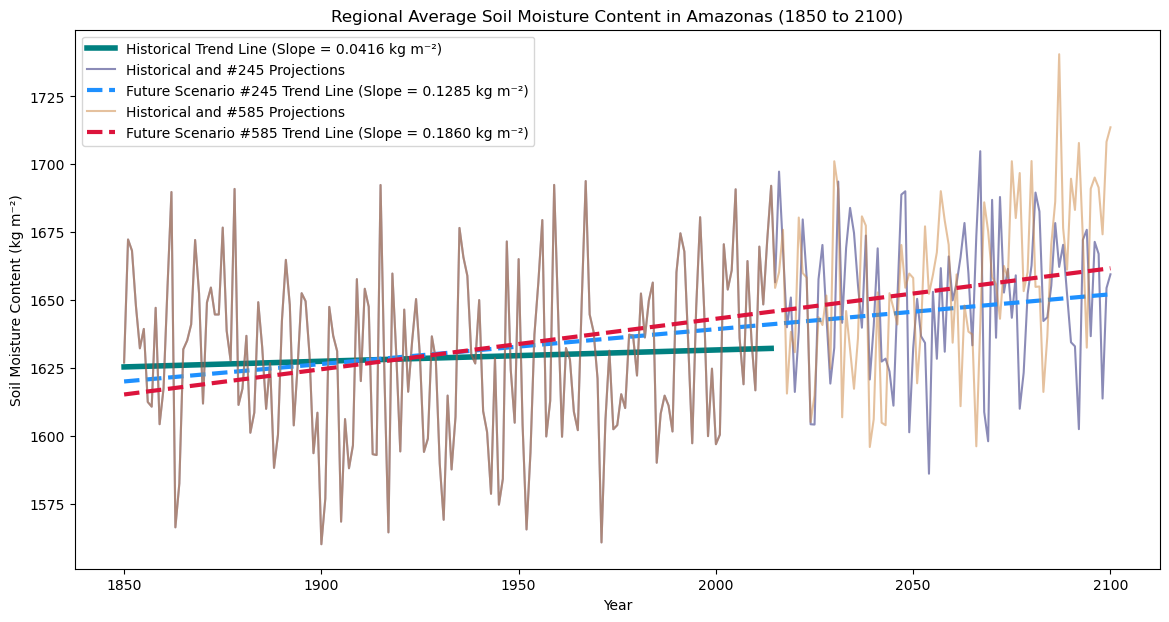

In [17]:
# create plotting variables
model_245_trend, hist_trend, model_245_mean, hist_mean, model_245_slope, hist_slope = get_trendline(azhist_soil, az245_soil, [az_lat_min, az_lat_max, az_lon_min, az_lon_max])
model_585_trend, hist_trend, model_585_mean, hist_mean, model_585_slope, hist_slope = get_trendline(azhist_soil, az585_soil, [az_lat_min, az_lat_max, az_lon_min, az_lon_max])

visualize_model(
    [model_245_trend, model_585_trend], # predicting trendlines
    hist_trend, # historical trendline
    [model_245_mean, model_585_mean], # predicting yearly averages for soil moisture
    hist_mean, # historical yearly average
    [model_245_slope, model_585_slope], # predictive coefs from linear regression (slope and y int, but we only use slope)
    hist_slope, # historical lin reg coeffs
    'Regional Average Soil Moisture Content in Amazonas (1850 to 2100)' # title of graph
)

### Tunisia

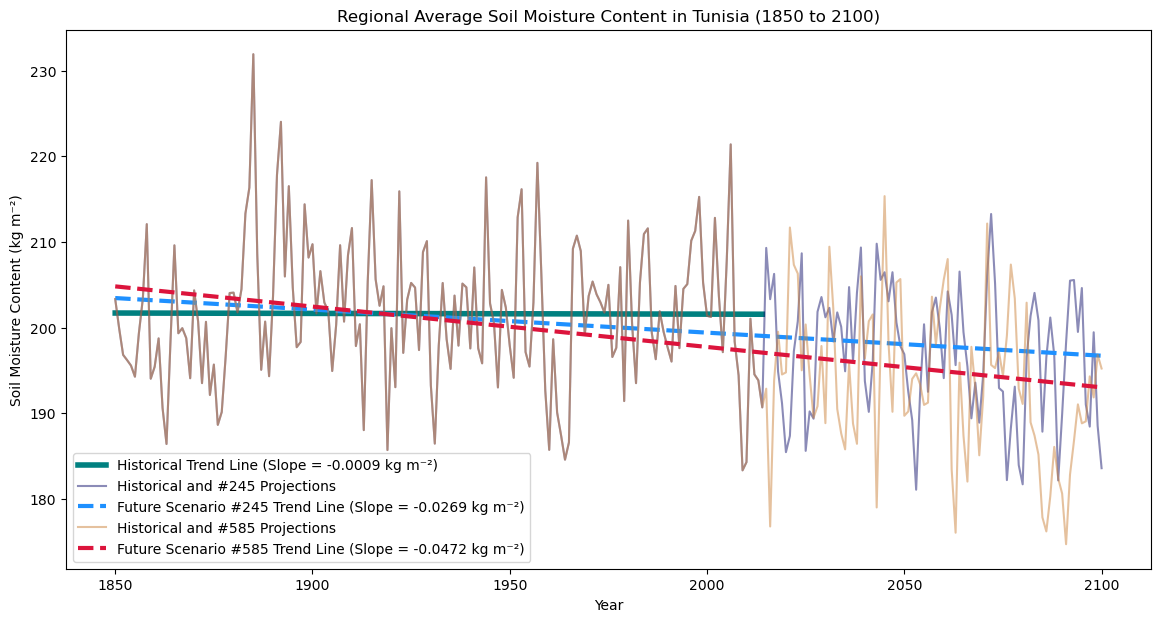

In [18]:
# create plotting variables for both scenario
model_245_trend, hist_trend, model_245_mean, hist_mean, model_245_slope, hist_slope = get_trendline(tuhist_soil, tu245_soil, [tu_lat_min, tu_lat_max, tu_lon_min, tu_lon_max])
model_585_trend, hist_trend, model_585_mean, hist_mean, model_585_slope, hist_slope = get_trendline(tuhist_soil, tu585_soil, [tu_lat_min, tu_lat_max, tu_lon_min, tu_lon_max])

# see comments from above
visualize_model([model_245_trend, model_585_trend], hist_trend, [model_245_mean, model_585_mean], hist_mean, [model_245_slope, model_585_slope], hist_slope, 'Regional Average Soil Moisture Content in Tunisia (1850 to 2100)')

# Interpretation

Amazonas and Tunisia are projected to experience opposite effects of global warming on soil moisture, both increasing and decreasing respectively. Furthermore, increasing the amount of carbon amplified these effects. This was expected for Tunisia, which is notably vulnerable to desertification. Trends in Amazonas were not however, as the amazon is expected to recieve less rainfall and become hotter and more prone to fire and dieback as global warming progresses. 

That being said, a possble explanation for this result is that the death of some vegetation due to increased temperatures will actually return some moisture to the soil, as the amazon is known for its extremely thin soils due to the canopy taking up all of its nutrients. This seems unlikely however, as the reduced shade would likely just lead to a drier environment, as [as suggested by the WWF](https://wwf.panda.org/discover/knowledge_hub/where_we_work/amazon/amazon_threats/climate_change_amazon/). It's likely a more nuanced model would return a different result.

# Link to Github

https://github.com/silkieMoth/eds-296-climate-modeling-hw1